### This analysis is done on the titanics dataset

In [5]:
### importing needed libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
#Loading the titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [7]:
#viewing the first five rows of the titanic data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#getting basic informations about the titanic data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### From the above, we can see that there are three colums with missing values. Age, cabin and Embarked columns. Let's check the number of missing values in each of these columns.

In [11]:
#checking the number of missing values in each of the columns with missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### The Age and Embarked columns have 177 and 2 missing values respectively which can be filled appropriately. Unlike these two columns, the Cabin column has 687 missing values which is over 75% of total entries of the column. Therefore we can confidently drop this column.

#### We can equally plot a chart to visualize the missing values. See below

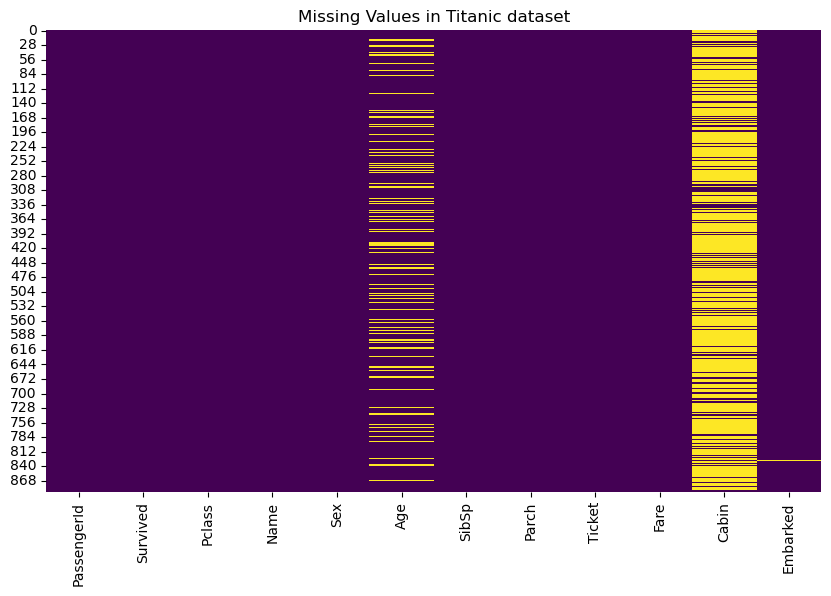

In [12]:
#plotting a chart to visualize missing values
plt.figure(figsize = (10, 6))
sns.heatmap(titanic_data.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Values in Titanic dataset')
plt.show()

#### Now we can fill the missing values appropriately. We will first check for outliers in the age column. If there are outliers, we will fill the missing values with the median age other than the mean age. The embarked column will be filled with the mode and the cabin column will be dropped.

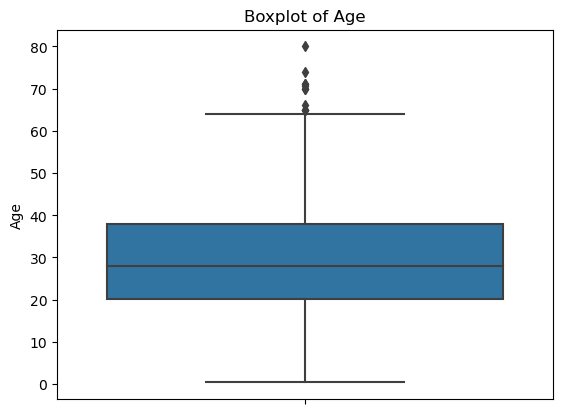

In [14]:
#visualing outliers in the age column
sns.boxplot(y = titanic_data['Age'])
plt.title('Boxplot of Age')
plt.show()

#### The age column has outliers as shown above. We will fill the missing values with the median age

In [16]:
#filling the missing values in the age column with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace = True)

#filling the missing values in the embarked column with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

#dropping the cabin column
titanic_data.drop(columns = 'Cabin', inplace = True)

#### Let's check for missing values again

In [17]:
#checking for missing values
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### There are no missing values in any of the columns. Next, let's have some descriptive statistics of the data

In [18]:
#descriptive statistics of all columns
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [19]:
#descriptive statistics of numerical columns only
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#descriptive statistics of the other columns
titanic_data.describe(include = ['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,646


#### The data is now cleaned and set for visualizations. Below are a few visualizations made from the titanic data
#### 1. Count plot for survival: This shows the count of passengers who survived and those that did not survive.

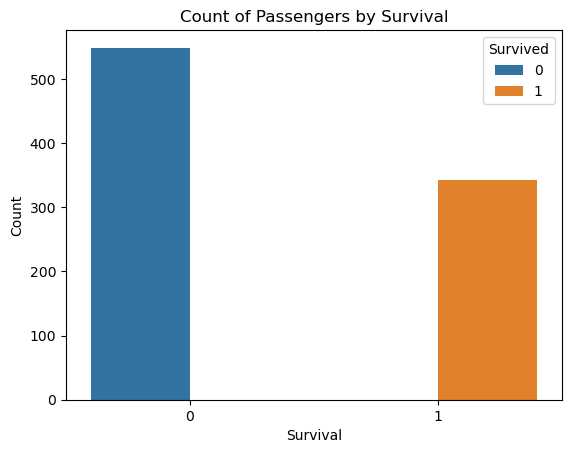

In [21]:
#count plot of survival
sns.countplot(x = 'Survived', data = titanic_data, hue = 'Survived')
plt.title('Count of Passengers by Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

#### 2. Count plot of passenger class: This shows the count of passengers by class only.

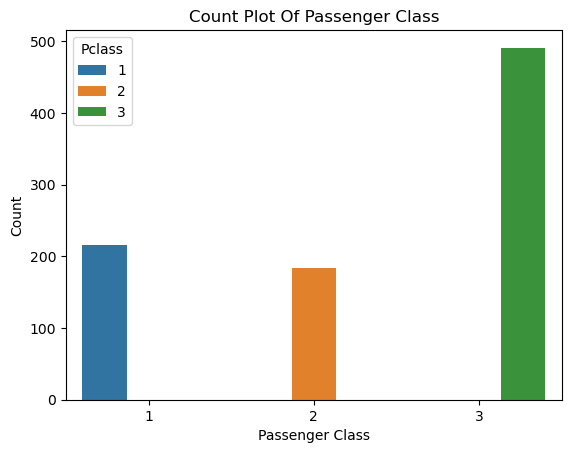

In [30]:
#count plot of passenger class only
sns.countplot(x = 'Pclass', data = titanic_data, hue = 'Pclass')
plt.title('Count Plot Of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

#### 3. Count plot for passenger class: This shows the count of passengers by class and their survival status

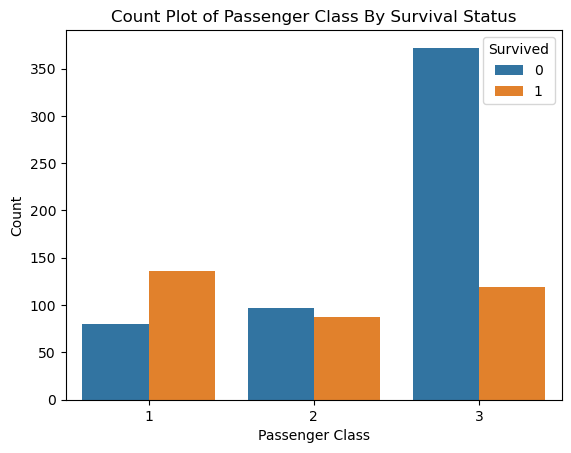

In [29]:
#Count plot for passenger class
sns.countplot(x = 'Pclass', data = titanic_data, hue = 'Survived')
plt.title('Count Plot of Passenger Class By Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

#### 4. Age distribution of passengers: This will show us the distribution of age of passengers

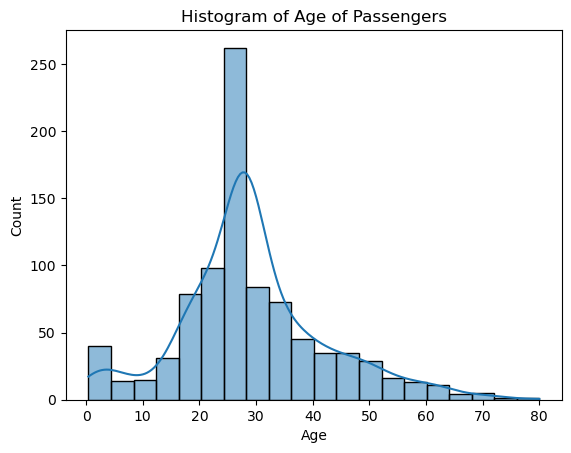

In [32]:
#histogram of age
sns.histplot(x = 'Age', data = titanic_data, bins = 20, kde = True)
plt.title('Histogram of Age of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### 5. Count of survival rate by sex: This shows the number of males and female passengers who survived and also show those who did not survive.

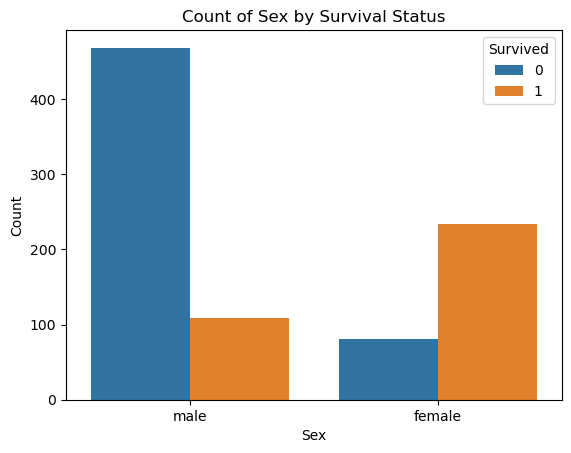

In [34]:
#survival rate by sex
sns.countplot(x = 'Sex', data = titanic_data, hue = 'Survived')
plt.title('Count of Sex by Survival Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### 6. Correlation of numerical features

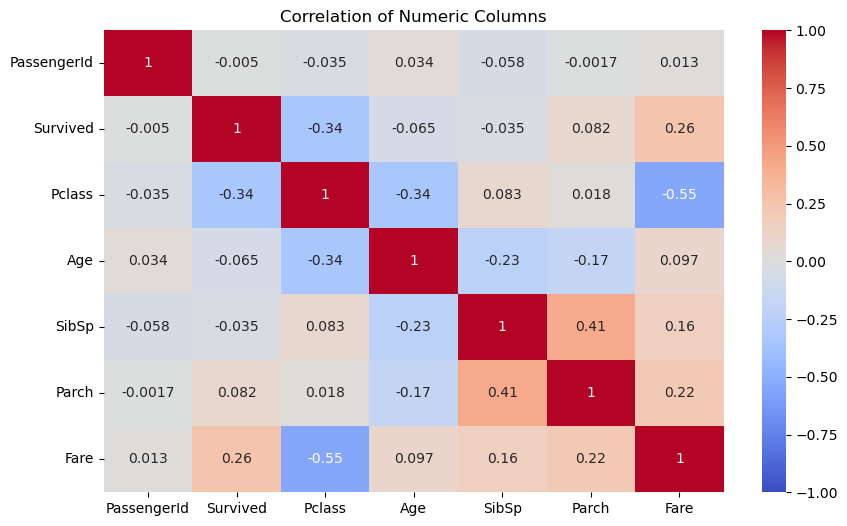

In [37]:
#plotting a correlation of nuerical features
num_cols = titanic_data.select_dtypes(include = ['int64', 'float64'])
corr_matrix = num_cols.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation of Numeric Columns')
plt.show()